# Project: No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# _Introduction_


> I have selected No-show appointments data because it looks interesting to know if there is some variable that is relevant to know if people finally show-up or not.
I am going to center my analisys in see if gender, age, day of the appointment, hypertension, diabetes or alcoholism are relevant.

<a id='intro'></a>


In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
# _Data Wrangling_

## General Properties

In [2]:
df = pd.read_csv('noshowappointments-may-2016.csv')

Let's see how the dataframe is.

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I see here that this statistics are no so helpful because only Age data make sense. Minimum age is -1 that is incorrect.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.duplicated().sum()

0

I see there are no null values or duplicated rows.

## Data Cleaning

These are the things I thing should be change:

- To change the name of some variables that seem to have typos.
- To drop columns PatientId and AppointmentId because they are not relevant for the analysis.
- To change datatype of ScheduledDay and AppointmentDay to datetime and delete hour in ScheduledDay because in AppointmentDay the hour does not appear and it will be better to compare both columns.

In [8]:
#Change column names
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'Alcoholism': 'Alcoholism', 'SMS_received': 'SMSreceived', 'No-show': 'Noshow'})

#Drop columns PatientId and AppointmentId
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

#Convert ScheduledDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMSreceived       110527 non-null int64
Noshow            110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [10]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Noshow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I am going to create new column with the difference between Appointment day and ScheduleDay to see if it shows us relevant data.
Also I am going to create a new column to extract the day of week of AppointmentDay and ScheduledDay.

In [11]:
# Create the new colunm
df['Waitingdays'] = df['AppointmentDay'] - df['ScheduledDay']
df['Waitingdays'] = df['Waitingdays'].dt.days

# Extract day of week
df['ScheduledDayWeek'] = df['ScheduledDay'].dt.weekday_name
df['AppointmentDayWeek'] = df['AppointmentDay'].dt.weekday_name

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
Gender                110527 non-null object
ScheduledDay          110527 non-null datetime64[ns]
AppointmentDay        110527 non-null datetime64[ns]
Age                   110527 non-null int64
Neighbourhood         110527 non-null object
Scholarship           110527 non-null int64
Hypertension          110527 non-null int64
Diabetes              110527 non-null int64
Alcoholism            110527 non-null int64
Handicap              110527 non-null int64
SMSreceived           110527 non-null int64
Noshow                110527 non-null object
Waitingdays           110527 non-null int64
ScheduledDayWeek      110527 non-null object
AppointmentDayWeek    110527 non-null object
dtypes: datetime64[ns](2), int64(8), object(5)
memory usage: 12.6+ MB


In [12]:
#Let's see the different ages that there are in the dataframe.
np.sort(df['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [13]:
df[df.Age == -1].shape[0]

1

It appears one person has -1 year old and this is impossible, so I am going to delete this record.

In [14]:
df = df[df.Age >= 0]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
Gender                110526 non-null object
ScheduledDay          110526 non-null datetime64[ns]
AppointmentDay        110526 non-null datetime64[ns]
Age                   110526 non-null int64
Neighbourhood         110526 non-null object
Scholarship           110526 non-null int64
Hypertension          110526 non-null int64
Diabetes              110526 non-null int64
Alcoholism            110526 non-null int64
Handicap              110526 non-null int64
SMSreceived           110526 non-null int64
Noshow                110526 non-null object
Waitingdays           110526 non-null int64
ScheduledDayWeek      110526 non-null object
AppointmentDayWeek    110526 non-null object
dtypes: datetime64[ns](2), int64(8), object(5)
memory usage: 13.5+ MB


In [16]:
df[df.Age == -1].shape[0]

0

In [17]:
np.sort(df['Age'].unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

Now the minimum age is 0.

In [18]:
#Let's see unique values in appointment day 
np.sort(df.AppointmentDay.dt.strftime('%Y-%m-%d').unique())

array(['2016-04-29', '2016-05-02', '2016-05-03', '2016-05-04',
       '2016-05-05', '2016-05-06', '2016-05-09', '2016-05-10',
       '2016-05-11', '2016-05-12', '2016-05-13', '2016-05-14',
       '2016-05-16', '2016-05-17', '2016-05-18', '2016-05-19',
       '2016-05-20', '2016-05-24', '2016-05-25', '2016-05-30',
       '2016-05-31', '2016-06-01', '2016-06-02', '2016-06-03',
       '2016-06-06', '2016-06-07', '2016-06-08'], dtype=object)

In [19]:
#Let's see unique values in scheduled day 
np.sort(df.ScheduledDay .dt.strftime('%Y-%m-%d').unique())

array(['2015-11-10', '2015-12-03', '2015-12-07', '2015-12-08',
       '2015-12-14', '2015-12-15', '2016-01-04', '2016-01-05',
       '2016-01-07', '2016-01-11', '2016-01-13', '2016-01-14',
       '2016-01-19', '2016-01-20', '2016-01-21', '2016-01-22',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-02-01', '2016-02-02', '2016-02-03',
       '2016-02-04', '2016-02-05', '2016-02-11', '2016-02-12',
       '2016-02-15', '2016-02-16', '2016-02-17', '2016-02-18',
       '2016-02-19', '2016-02-22', '2016-02-23', '2016-02-24',
       '2016-02-25', '2016-02-26', '2016-02-29', '2016-03-01',
       '2016-03-02', '2016-03-03', '2016-03-04', '2016-03-05',
       '2016-03-07', '2016-03-08', '2016-03-09', '2016-03-10',
       '2016-03-11', '2016-03-14', '2016-03-15', '2016-03-16',
       '2016-03-17', '2016-03-18', '2016-03-19', '2016-03-21',
       '2016-03-22', '2016-03-23', '2016-03-28', '2016-03-29',
       '2016-03-30', '2016-03-31', '2016-04-01', '2016-

<a id='eda'></a>
# _Exploratory Data Analysis_


## Is the gender important?

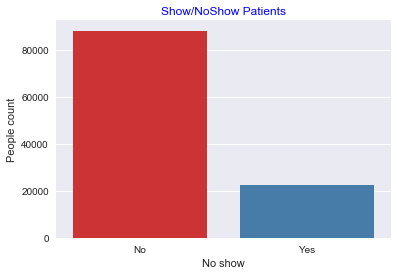

In [20]:
sns.set(style="darkgrid")
p1 = sns.countplot(x=df.Noshow, data=df, palette="Set1")
p1.set_title("Show/NoShow Patients", color='b')
plt.ylabel('People count')
plt.xlabel('No show')
plt.show()

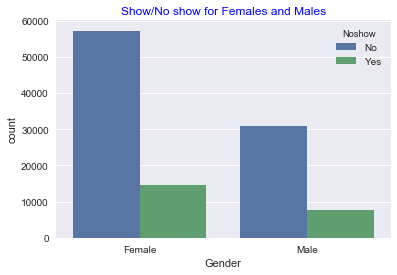

In [21]:
p2 = sns.countplot(x=df.Gender, hue=df.Noshow, data=df)
p2.set_title("Show/No show for Females and Males", color='b')
x_ticks_labels=['Female', 'Male']
p2.set_xticklabels(x_ticks_labels)
plt.show()

In these graphs above, it shows that more women go to the doctor than men. And the no show appointments bar looks similar in proportion in both cases. Numbers below demonstrate this, around 80% of both genders attend their appointments.

In [22]:
#Let's filter female by No show to see exactly numbers.
df[df.Gender == 'F'].groupby(['Noshow']).size()

Noshow
No     57245
Yes    14594
dtype: int64

In [23]:
#Let's filter male by No show to see exactly numbers.
df[df.Gender == 'M'].groupby(['Noshow']).size()

Noshow
No     30962
Yes     7725
dtype: int64

In [24]:
#Calculate attending proportion according to gender
df[df.Noshow == 'No'].groupby(['Gender']).size()/df.groupby(['Gender']).size()

Gender
F    0.796851
M    0.800321
dtype: float64

## What the different ages tell to us?

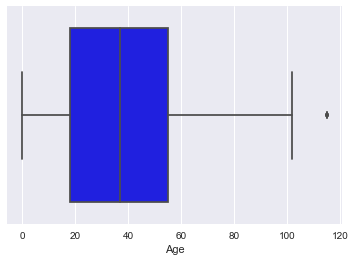

In [25]:
sns.boxplot(x=df.Age, palette=['b', 'r']);

In [26]:
df.Age.median()

37.0

In the boxplot above we see median is 37. Also, it shows a few data points as outliers.

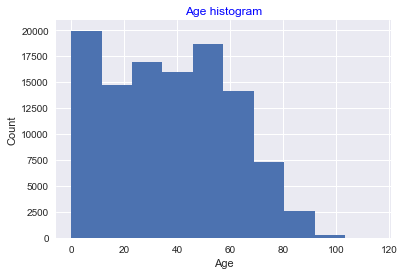

In [27]:
df['Age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age histogram', color='b');

Age distribution is skewed to the right.

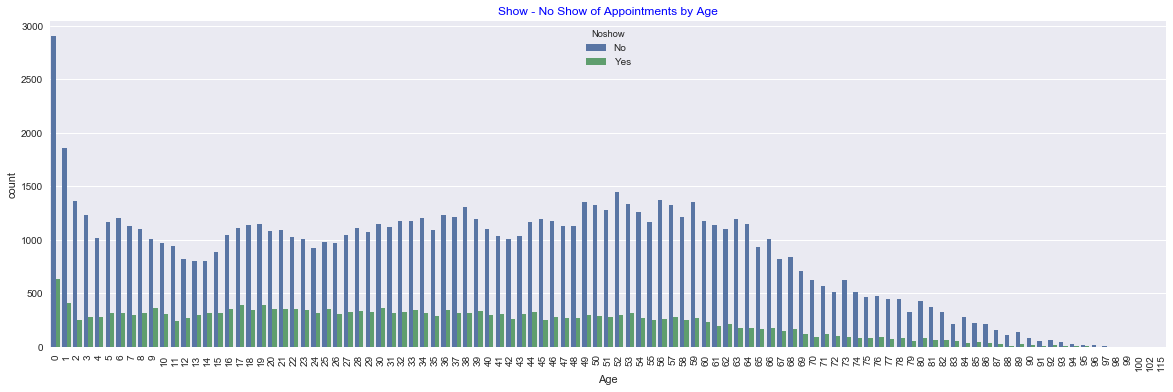

In [28]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
p3 = sns.countplot(x=df.Age, hue=df.Noshow)
p3.set_title("Show - No Show of Appointments by Age", color='b')
plt.show()

In [29]:
#Calculate attending proportion according to Age
df_ageratio = df[df.Noshow == 'No'].groupby(['Age']).size()/df.groupby(['Age']).size()

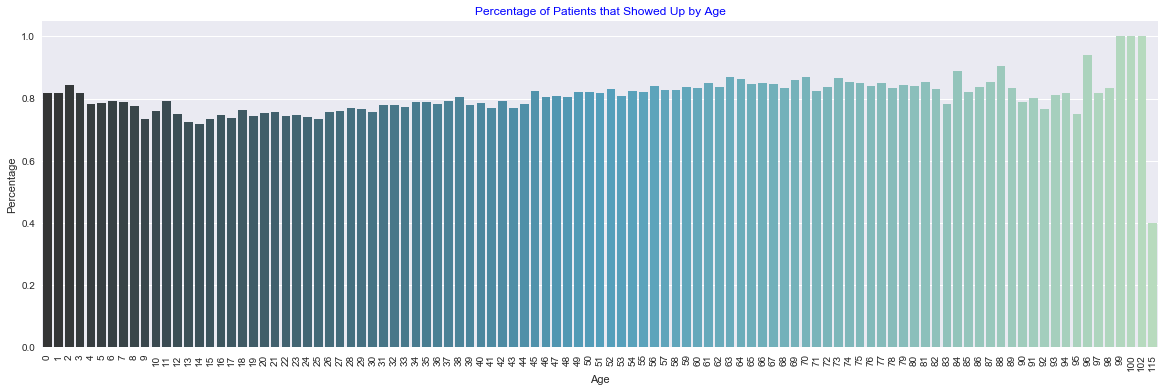

In [30]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
p3 = sns.barplot(x=df_ageratio.index, y=df_ageratio, palette="GnBu_d")
p3.set_title("Percentage of Patients that Showed Up by Age", color='b')
p3.set(ylabel='Percentage');
plt.show()

This graph shows us that young people, since 9 to 30, have less percentage of show-up. The older people has the higher percentage, but the eldest one has the lowest one. This is an outlier.

In [31]:
df_ageratio.mean()

0.8072764735895537

It shows that percentage is around 80%.

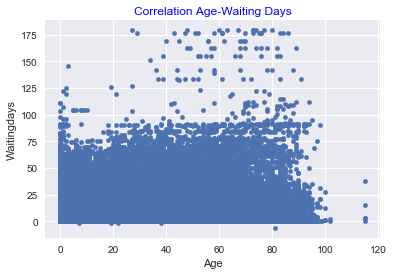

In [32]:
df.plot(x='Age', y='Waitingdays', kind='scatter')
plt.title('Correlation Age-Waiting Days', color = 'b');

As curiosity we see there is no correlation between Age and the waiting days since schedule day and appointment day.

## Attendance depends on day of week?

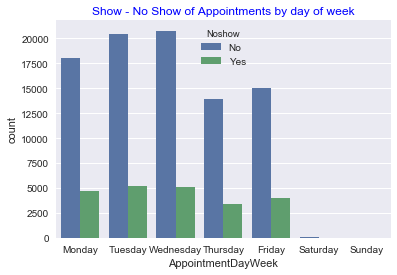

In [33]:
week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
p4 = sns.countplot(x=df.AppointmentDayWeek, hue=df.Noshow, order=week)
p4.set_title("Show - No Show of Appointments by day of week", color='b');

In [34]:
#Let's see the proportion by day
df[df.Noshow == 'No'].groupby(['AppointmentDayWeek']).size()/df.groupby(['AppointmentDayWeek']).size()

AppointmentDayWeek
Friday       0.787739
Monday       0.793519
Saturday     0.769231
Thursday     0.806459
Tuesday      0.799064
Wednesday    0.803108
dtype: float64

Here we see that as in the previous analysis, the % of attendance by day of week is around 80%. Tuesday and Wednesday are the days with higher appointments.

## Are Hypertension, Diabetes or alcoholism important to show up?        

In [35]:
#Calculate the ratio of show-up
df_hratio = df[df.Noshow == 'No'].groupby(['Hypertension']).size()/df.groupby(['Hypertension']).size()
df_dratio = df[df.Noshow == 'No'].groupby(['Diabetes']).size()/df.groupby(['Diabetes']).size()
df_aratio = df[df.Noshow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()

Hypertension
0    0.790961
1    0.826980
dtype: float64


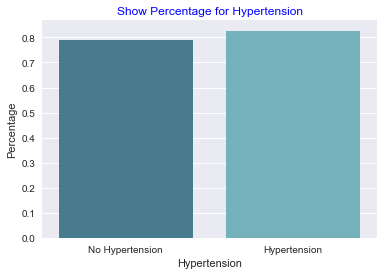

In [36]:
p5 = sns.barplot(x=df_hratio.index, y=df_hratio, palette="GnBu_d")
p5.set_title("Show Percentage for Hypertension", color='b')
x_ticks_labels=['No Hypertension', 'Hypertension']
p5.set_xticklabels(x_ticks_labels)
p5.set(ylabel='Percentage');
print(df_hratio)

Diabetes
0    0.796370
1    0.819967
dtype: float64


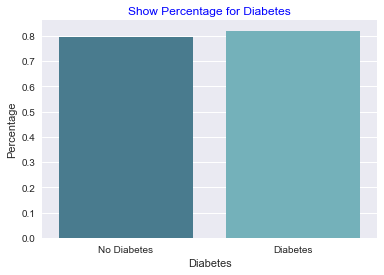

In [37]:
p5 = sns.barplot(x=df_dratio.index, y=df_dratio, palette="GnBu_d")
p5.set_title("Show Percentage for Diabetes", color='b')
x_ticks_labels=['No Diabetes', 'Diabetes']
p5.set_xticklabels(x_ticks_labels)
p5.set(ylabel='Percentage');
print(df_dratio)

Alcoholism
0    0.798052
1    0.798512
dtype: float64


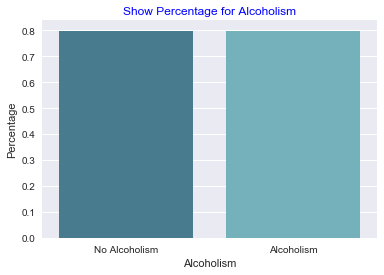

In [38]:
p5 = sns.barplot(x=df_aratio.index, y=df_aratio, palette="GnBu_d")
p5.set_title("Show Percentage for Alcoholism", color='b')
x_ticks_labels=['No Alcoholism', 'Alcoholism']
p5.set_xticklabels(x_ticks_labels)
p5.set(ylabel='Percentage');
print(df_aratio)

In the graphs above it shows that in the case of hypertension or diabetes show-up percentage is a bit higher in people who have these illnesses.
On the other hand in case of alcoholism, the % is almost equal. So it is no relevant to suffer it or not.

<a id='conclusions'></a>

# _Conclusions_
### Limitations

> There are not NaN values in the data but I have found and other limitations:

- Maybe to know the specialist that each person attend, would help to figure out if to have a illness or not is really determinate. With the actual data we don't know what is the reason for each appointment. It is not the same if it is a rutinary one or if it is an urgent.

- Also, the missing time data in AppointmentDay would help to do a more exactly comparation with ScheduledDay. In this case, I have dropped the hour in ScheduleDay and maybe it would give us interest information.

- On the other hand, I have observed that Appointmentday covers only one month, from 2016-04-29 to 2016-06-08. In my opinion one month don't make an exact representation. For example, having data for a whole year would help to do a better analysis.

### Conclusion

>As it shows during the analysis there is no a deterinate variable that have a big effect on show-up or not.
In all cases the percentage of appointment is around 80%. The only cases in which percentage is more dan 80% is in diabetes and hypertension. So, with the data I have analyzed there is no a decisive factor for going to the medical appointment.


